**`DESCRIPTION`**

Reduce the time a Mercedes-Benz spends on the test bench.

**`Problem Statement Scenario`** :
Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include the passenger safety cell with a crumple zone, the airbag, and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium carmakers. Mercedes-Benz is the leader in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams.

To ensure the safety and reliability of every unique car configuration before they hit the road, the company’s engineers have developed a robust testing system. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Mercedes-Benz’s production lines. However, optimizing the speed of their testing system for many possible feature combinations is complex and time-consuming without a powerful algorithmic approach.

You are required to reduce the time that cars spend on the test bench. Others will work with a dataset representing different permutations of features in a Mercedes-Benz car to predict the time it takes to pass testing. Optimal algorithms will contribute to faster testing, resulting in lower carbon dioxide emissions without reducing Mercedes-Benz’s standards.

**`Following actions should be performed`** :

1. If for any column(s), the variance is equal to zero, then you need to remove those variable(s).

2. Check for null and unique values for test and train sets.

3. Apply label encoder.

4. Perform dimensionality reduction.

5. Predict your test_df values using XGBoost.

This Project is **First One in the Assessment list of Projects** under ML course work. Solved by Rocky Jagtiani - SME@Simplilearn for his learner friends. 

**You can be connected to Rocky Jagtiani** on Linkedin - https://www.linkedin.com/in/rocky-jagtiani-3b390649/

In [ ]:
## data Source Link : 
## https://github.com/Simplilearn-Edu/Machine-Learning--Projects/tree/master/Projects/Projects%20for%20Submission/Project%201%20-%20Mercedes-Benz%20Greener%20Manufacturing/Dataset%20for%20the%20project

from google.colab import files 
uploadedTrainSet = files.upload()

Saving MERCtrain.csv to MERCtrain.csv


In [ ]:
## loading the MercTest dataset
from google.colab import files 
uploadedTestSet = files.upload()

Saving MERCtest.csv to MERCtest.csv


In [ ]:
# Create an ML algorithm that can accurately predict the time a car will spend on the test bench 
# based on the vehicle configuration

# Agenda
# 1. If for any column(s), the variance is equal to zero, then you need to remove those variable(s)
# 2. Check for null and unique values for test and train sets
# 3. Apply label encoder for categorical variables
# 4. Perform dimensaionlity reduction with PCA
# 5. Predict the test_df values using xgboost

In [ ]:
# Importing the required libraries
# Loading the train/test data
# The lowercase alphabets are categorical variables
import numpy as np
import pandas as pd

train = pd.read_csv('MERCtrain.csv')
train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
print('Size of training set')
print(train.shape)

Size of training set
(4209, 378)


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [ ]:
# Separating y column as this is for prediction output
y_train = train['y'].values
y_train

array([130.81,  88.53,  76.26, ..., 109.22,  87.48, 110.85])

In [ ]:
# A lot of columns that have an X 
# Let's check for the same 
# 376 features with X
colums_x = [c for c in train.columns if 'X' in c]

# info about colums_x
print(len(colums_x))
print(train[colums_x].dtypes.value_counts())

376
int64     368
object      8
dtype: int64


In [ ]:
# Looking at the test dataset for simiilar features
test = pd.read_csv('MERCtest.csv')
test.head()


,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,...,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
print('Size of training set')
test.shape

Size of training set


(4209, 377)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 377 entries, ID to X385
dtypes: int64(369), object(8)
memory usage: 12.1+ MB


In [ ]:
# Creating the final dataset
# Removing unwanted columns (ID); y has been removed earlier
final_column = list(set(train.columns) - set(['ID', 'y']))

x_train = train[final_column]
# x_train
x_test = test[final_column]
# x_test

In [ ]:
# Searching for null values
# Creating a function for the same
def detect(df):
    if df.isnull().any().any():
        print("Yes")
    else:
        print("No")

detect(x_train)
detect(x_test)

# Observation : There are no missing values.

No
No


In [ ]:
## EDA
# Integer Columns Analysis
unique_value_dict = {}
for col in x_train.columns:
    if col not in ["ID", "y", "X0", "X1", "X2", "X3", "X4", "X5", "X6", "X8"]:
        unique_value = str(np.sort(x_train[col].unique()).tolist())
        t_list = unique_value_dict.get(unique_value, [])
        t_list.append(col)
        unique_value_dict[unique_value] = t_list[:]
for unique_val, columns in unique_value_dict.items():
    print("Columns containing the unique values : ",unique_val)
    print(columns)
    print("-----------------------------------------------------------")

Columns containing the unique values :  [0, 1]
['X382', 'X92', 'X272', 'X12', 'X48', 'X267', 'X304', 'X115', 'X281', 'X163', 'X126', 'X357', 'X137', 'X177', 'X378', 'X64', 'X232', 'X250', 'X79', 'X323', 'X260', 'X97', 'X319', 'X103', 'X55', 'X61', 'X325', 'X376', 'X301', 'X71', 'X201', 'X288', 'X60', 'X234', 'X139', 'X355', 'X215', 'X300', 'X352', 'X343', 'X326', 'X365', 'X338', 'X174', 'X113', 'X18', 'X200', 'X336', 'X154', 'X314', 'X30', 'X152', 'X143', 'X223', 'X229', 'X159', 'X273', 'X131', 'X240', 'X94', 'X129', 'X306', 'X16', 'X140', 'X270', 'X106', 'X328', 'X353', 'X165', 'X116', 'X184', 'X305', 'X27', 'X21', 'X117', 'X160', 'X227', 'X46', 'X182', 'X100', 'X105', 'X202', 'X274', 'X147', 'X373', 'X256', 'X335', 'X374', 'X34', 'X138', 'X148', 'X135', 'X14', 'X67', 'X102', 'X198', 'X164', 'X146', 'X377', 'X197', 'X313', 'X248', 'X40', 'X311', 'X78', 'X266', 'X99', 'X334', 'X29', 'X169', 'X24', 'X32', 'X82', 'X144', 'X114', 'X241', 'X354', 'X344', 'X211', 'X239', 'X75', 'X294', 'X31

In [ ]:
# Removal of columns with a variance of 0
# means columns that have only one unique value 0. 

for column in final_column:
    check = len(np.unique(x_train[column]))
    if check == 1:
        x_train.drop(column, axis = 1, inplace=True) 
        x_test.drop(column, axis = 1, inplace=True)

x_train.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,X31,X50,X218,X351,X354,X359,X60,X104,X204,X136,X280,X27,X275,X337,X316,X265,X368,X277,X166,X373,X55,X321,X298,X97,X39,X59,X229,X123,X267,X160,X370,X222,X225,X175,X46,X151,X14,X183,X47,X85,...,X292,X214,X194,X168,X129,X173,X192,X155,X311,X156,X69,X342,X350,X57,X43,X105,X102,X20,X152,X112,X6,X35,X42,X180,X228,X165,X315,X101,X253,X157,X200,X224,X258,X127,X325,X134,X84,X355,X210,X282
0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,j,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,1,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,l,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,j,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0
3,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,l,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0
4,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,d,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
## Label encoding the Categorical columns
from sklearn import preprocessing
for f in ["X0", "X1", "X2", "X3", "X4", "X5", "X6", "X8"]:
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(x_train[f].values)) 
        x_train[f] = lbl.transform(list(x_train[f].values))
        #x_test[f] = lbl.transform(list(x_test[f].values))   ## as values in test dataset differs from train set

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


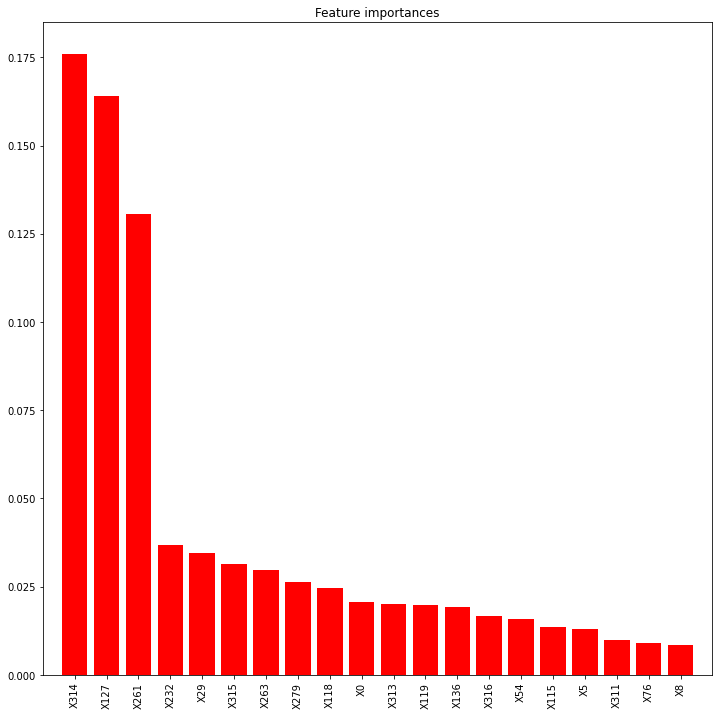

In [ ]:
## Let us build a Random Forest model and check the important variables.

from sklearn import ensemble
model = ensemble.RandomForestRegressor(n_estimators=200, 
                                       max_depth=10, min_samples_leaf=4, 
                                       max_features=0.2, n_jobs=-1, 
                                       random_state=0)
model.fit(x_train, y_train)
feat_names = x_train.columns.values

## plot the importances ##
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1][:20]

import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color="r", align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()

In [ ]:
# Performing dimensionality reduction with principal components analysis
from sklearn.decomposition import PCA
n_comp = 12
pca = PCA(n_components = n_comp, random_state = 42)
pca_result_train = pca.fit_transform(x_train)
##pca_result_test = pca.transform(x_test)


In [ ]:
#print(pca_result_train)
#print(pca_result_test)

In [ ]:
# ML Modeling with XGboost
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Splitting the data by 80/20
x_train, x_valid, y_train, y_valid = train_test_split(pca_result_train, 
                                                      y_train, 
                                                      test_size = 0.2, 
                                                      random_state = 42)

In [ ]:
# Building the final feature set
f_train = xgb.DMatrix(x_train, label = y_train)
f_valid = xgb.DMatrix(x_valid, label = y_valid)

#f_test = xgb.DMatrix(pca_result_test)

## DMatrix is an internal data structure that is used by XGBoost, 
## which is optimized for both memory efficiency and training speed.

## https://xgboost.readthedocs.io/en/latest/python/python_api.html

In [ ]:
# Setting the parameters for XGB
params = {}
params['objective'] = 'reg:linear'
params['eta'] = 0.02  ## eta means learning rate
params['max_depth'] = 4

In [ ]:
# Predicting the score
# Creating a function for the same

def scorer(m, w):
    labels = w.get_label()
    return 'r2', r2_score(labels, m)

final_set = [(f_train, 'train'), (f_valid, 'valid')]

P = xgb.train(params, f_train, 1000, final_set, early_stopping_rounds=50, feval=scorer, maximize=True, verbose_eval=10)

## xgb.train: eXtreme Gradient Boosting Training
## xgb.train is an advanced interface for training an xgboost model.
## https://www.rdocumentation.org/packages/xgboost/versions/1.4.1.1/topics/xgb.train

[12:08:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:98.997	valid-rmse:98.8867	train-r2:-59.4974	valid-r2:-61.8242
Multiple eval metrics have been passed: 'valid-r2' will be used for early stopping.

Will train until valid-r2 hasn't improved in 50 rounds.
[10]	train-rmse:81.1453	valid-rmse:81.0543	train-r2:-39.6462	valid-r2:-41.2088
[20]	train-rmse:66.6002	valid-rmse:66.5277	train-r2:-26.3806	valid-r2:-27.4352
[30]	train-rmse:54.7609	valid-rmse:54.7209	train-r2:-17.5111	valid-r2:-18.2379
[40]	train-rmse:45.1431	valid-rmse:45.1191	train-r2:-11.5798	valid-r2:-12.0789
[50]	train-rmse:37.3534	valid-rmse:37.3566	train-r2:-7.61298	valid-r2:-7.96573
[60]	train-rmse:31.0708	valid-rmse:31.0892	train-r2:-4.95932	valid-r2:-5.2097
[70]	train-rmse:26.0281	valid-rmse:26.0455	train-r2:-3.18194	valid-r2:-3.3583
[80]	train-rmse:22.0046	valid-rmse:22.0266	train-r2:-1.98894	valid-r2:-2.11706
[90]	train-rmse:18.8181	v

In [ ]:
# Predicting on test set
#p_test = P.predict(f_test)
p_test = P.predict(f_valid)
p_test

array([ 92.13976 ,  98.33151 , 103.16978 ,  79.056694, 112.62726 ,
       102.15868 ,  92.27759 , 102.426346, 105.02871 , 115.03128 ,
        76.80262 ,  96.26303 ,  96.59028 , 102.32741 ,  96.18344 ,
        95.651535, 109.3405  ,  95.92789 ,  95.05048 , 117.10938 ,
       114.188194,  96.71512 ,  95.4158  , 100.66559 ,  93.36283 ,
       111.39072 ,  95.33104 ,  77.84384 ,  93.3554  ,  94.3129  ,
        94.68137 , 102.17128 ,  96.771805, 109.5918  , 100.01874 ,
       116.18835 , 112.0443  ,  99.110855,  91.748924,  97.959465,
       113.73786 , 101.96226 , 124.15515 , 108.48761 ,  95.73124 ,
       102.299324,  91.560265, 103.67498 , 109.2494  , 103.85973 ,
        94.54416 ,  98.18839 , 104.153564, 106.86316 ,  99.62406 ,
       100.448685,  98.779076, 111.5428  ,  95.53801 ,  96.97142 ,
       109.226364,  76.06877 ,  94.64115 ,  95.6793  ,  77.75505 ,
        98.83487 ,  94.230774, 101.497086, 103.85973 ,  98.59202 ,
        93.40609 ,  94.856674,  98.62    , 105.980675,  95.176

In [ ]:
Predicted_Data = pd.DataFrame()
Predicted_Data['y'] = p_test
Predicted_Data.head()

,y
0,92.139763
1,98.331512
2,103.169777
3,79.056694
4,112.627258


**RESOURCES USED** :
https://www.kaggle.com/tarunsolanki/mercedes-benz-simple-eda 